In [2]:
!pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.10
    Uninstalling aiohttp-3.11.10:
      Successfully uninstalled aiohttp-3.11.10


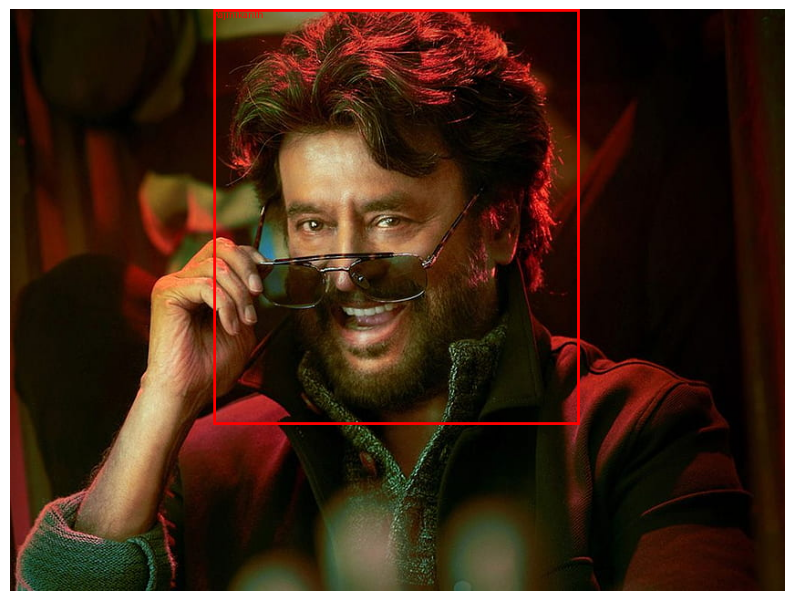

In [11]:
import requests
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to draw bounding boxes
def draw_boxes(image_path, predictions):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for pred in predictions:
        # Extract bounding box and label
        x_min = pred['x'] - pred['width'] / 2
        y_min = pred['y'] - pred['height'] / 2
        x_max = pred['x'] + pred['width'] / 2
        y_max = pred['y'] + pred['height'] / 2
        label = pred['class']

        # Draw rectangle and label
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
        draw.text((x_min, y_min), label, fill="red")

    return image

# Run inference
response = CLIENT.infer(
    "/content/desktop-wallpaper-rajinikanth-latest-rajinikanth-to.jpg",
    model_id="rajinikanth/2"
)

# Parse predictions
predictions = response['predictions']

# Draw bounding boxes on the image
image_with_boxes = draw_boxes("/content/desktop-wallpaper-rajinikanth-latest-rajinikanth-to.jpg", predictions)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.show()


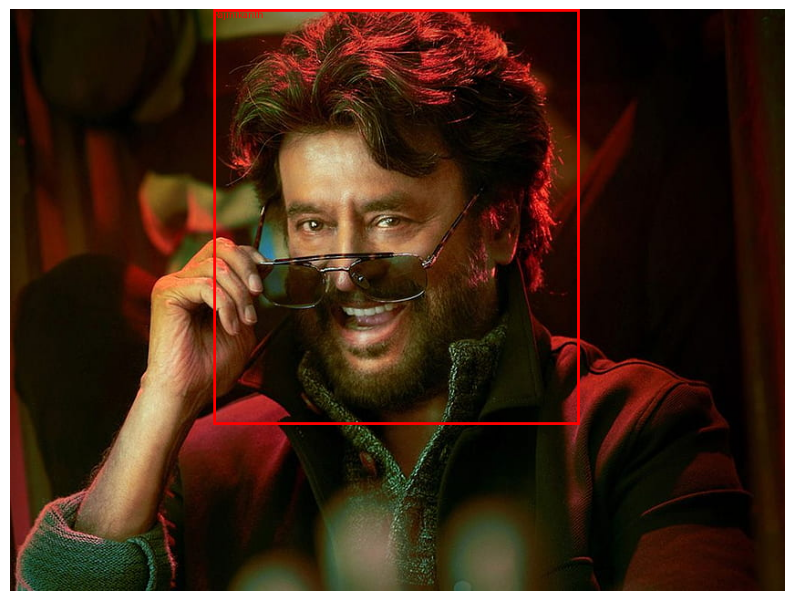

In [12]:
import requests
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to draw bounding boxes
def draw_boxes(image_path, predictions):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for pred in predictions:
        # Extract bounding box and label
        x_min = pred['x'] - pred['width'] / 2
        y_min = pred['y'] - pred['height'] / 2
        x_max = pred['x'] + pred['width'] / 2
        y_max = pred['y'] + pred['height'] / 2
        label = pred['class']

        # Draw rectangle and label
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
        draw.text((x_min, y_min), label, fill="red")

    return image

# Run inference
response = CLIENT.infer(
    "/content/desktop-wallpaper-rajinikanth-latest-rajinikanth-to.jpg",
    model_id="rajinikanth/2"
)

# Parse predictions
predictions = response['predictions']

# Draw bounding boxes on the image
image_with_boxes = draw_boxes("/content/desktop-wallpaper-rajinikanth-latest-rajinikanth-to.jpg", predictions)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.show()


In [16]:
import zipfile
import os

# Define the zip file path and the target folder
zip_file_path = "/content/Rajinikanth.v2i.yolov8.zip"  # Path to the ZIP file
target_folder = "/content/dataset"  # Folder where you want to extract

# Ensure the target folder exists
os.makedirs(target_folder, exist_ok=True)

# Unzip the file into the target folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

print(f"Files have been extracted to: {target_folder}")


Files have been extracted to: /content/dataset


In [17]:

!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 22.7 MB/s eta 0:00:00


In [19]:
from ultralytics import YOLO

# Initialize the YOLOv8 model
model = YOLO('yolov8n.yaml')  # 'yolov8n.yaml' is the YOLOv8 nano model configuration

# Train the model
results = model.train(
    data="/content/dataset/data.yaml",  # Path to your dataset configuration file
    epochs=10,  # Number of training epochs
    imgsz=640,  # Image size for training (default is 640)
    batch=16   # Batch size (adjust based on GPU memory)

)


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 18.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 965.10it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/dataset/valid/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 1851.86it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.143       4.22       4.24          7        640: 100%|██████████| 8/8 [02:08<00:00, 16.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

                   all         11         13    0.00364      0.923     0.0444     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.967      4.205      4.227          6        640: 100%|██████████| 8/8 [01:48<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]

                   all         11         13    0.00333      0.846     0.0279    0.00606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.972      4.066      4.163          5        640: 100%|██████████| 8/8 [01:45<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]

                   all         11         13    0.00303      0.769     0.0431    0.00854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.061      4.067      4.157          5        640: 100%|██████████| 8/8 [01:43<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all         11         13    0.00333      0.846     0.0468    0.00828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.103      4.013      4.122          6        640: 100%|██████████| 8/8 [01:50<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         11         13    0.00303      0.769     0.0229    0.00568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.106      3.994      4.069         19        640: 100%|██████████| 8/8 [01:47<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]

                   all         11         13    0.00333      0.846      0.114     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.079      3.983      4.052          6        640: 100%|██████████| 8/8 [01:47<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         11         13    0.00273      0.692     0.0377    0.00948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.084       3.89      4.046         18        640: 100%|██████████| 8/8 [01:46<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

                   all         11         13    0.00333      0.846     0.0535    0.00883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.958      3.968      4.058          6        640: 100%|██████████| 8/8 [01:45<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         11         13    0.00333      0.846     0.0305    0.00461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      3.107      3.967      4.012          5        640: 100%|██████████| 8/8 [01:44<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all         11         13    0.00364      0.923     0.0312    0.00475



10 epochs completed in 0.317 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


                   all         11         13    0.00333      0.846     0.0841     0.0145
Speed: 2.5ms preprocess, 224.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train
